In [1]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

file_path = "Assessments.xlsx"

with open(file_path, "rb") as f:
    content = f.read()

with open("Assessments.xlsx", "wb") as f:
    f.write(content)

df = pd.read_excel("Assessments.xlsx", engine="openpyxl")
df

,TOPF\nSubject ID,Block Design Score
0,C008,34
1,C009,24
2,C013,48
3,C016,39
4,C017,36
5,C021,29
6,C024,42
7,C025,24
8,C032,63
9,C033,57


In [10]:
#Question_1: Descriptive Statistics for Block Design Scores

print("\n Question 1: Descriptive Statistics for Block Design Scores:")
print(df["Block Design Score"].describe())


 Question 1: Descriptive Statistics for Block Design Scores:
count    13.000000
mean     39.307692
std      12.324668
min      24.000000
25%      30.000000
50%      36.000000
75%      48.000000
max      63.000000
Name: Block Design Score, dtype: float64


In [11]:
import glob

In [12]:
# Question 2: Compute Total Completion Time for Each Participant
file_list = glob.glob("*_SimpleStew_CompletedStepsData.csv")

# Extract participant IDs
participant_ids = [file.split("_")[0] for file in file_list]

def compute_max_session_time(file_path):
    """Compute maximum session time from a given CSV file."""
    try:
        df = pd.read_csv(file_path)
        max_time = df["Session Time"].max()
        return max_time
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return np.nan

# Compute maximum session time for each participant
max_times = {pid: compute_max_session_time(f"{pid}_SimpleStew_CompletedStepsData.csv") for pid in participant_ids}
df_max_time = pd.DataFrame(max_times.items(), columns=["TOPF Subject ID", "Total Completion Time"])

print("\nQuestion 2: Total Completion Time for Each Participant")
print(df_max_time)


Question 2: Total Completion Time for Each Participant
   TOPF Subject ID  Total Completion Time
0             C008             352.999298
1             C009             452.493500
2             C013             451.592560
3             C016             198.272446
4             C017             403.606689
5             C021             580.019897
6             C024             200.094406
7             C025             430.629974
8             C032             251.382736
9             C033             476.875946
10            C037             542.508423
11            C040             261.565430
12            C041             324.162415


In [13]:
import numpy as np
from scipy.stats import spearmanr

In [14]:
# Question 3: Spearman Correlation

df_max_time.columns = df_max_time.columns.str.strip()
df.columns = df.columns.str.strip()

# Debugging: (We got an error here, so we plan to know the column names).
print("\nColumns in df_assess:", df.columns.tolist())
print("Columns in df_max_time:", df_max_time.columns.tolist())


Columns in df_assess: ['TOPF\nSubject ID', 'Block Design Score', 'TOPF Subject ID']
Columns in df_max_time: ['TOPF Subject ID', 'Total Completion Time']


In [15]:
#Making sure that column names matching
df_max_time["TOPF Subject ID"] = df_max_time["TOPF Subject ID"].astype(str)
df["TOPF Subject ID"] = df["TOPF\nSubject ID"].astype(str)

# Block Design Scores with Total Completion Time
df_merged = df.merge(df_max_time, on="TOPF Subject ID", how="left")

# Spearman Correlation
if 'Total Completion Time' in df_merged.columns:
    correlation, p_value = spearmanr(df_merged['Block Design Score'], df_merged['Total Completion Time'], nan_policy='omit')
    print(f"\nQuestion 3: Spearman Correlation: {correlation:.3f}, p-value: {p_value:.3f}")


Question 3: Spearman Correlation: -0.397, p-value: 0.180


In [16]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

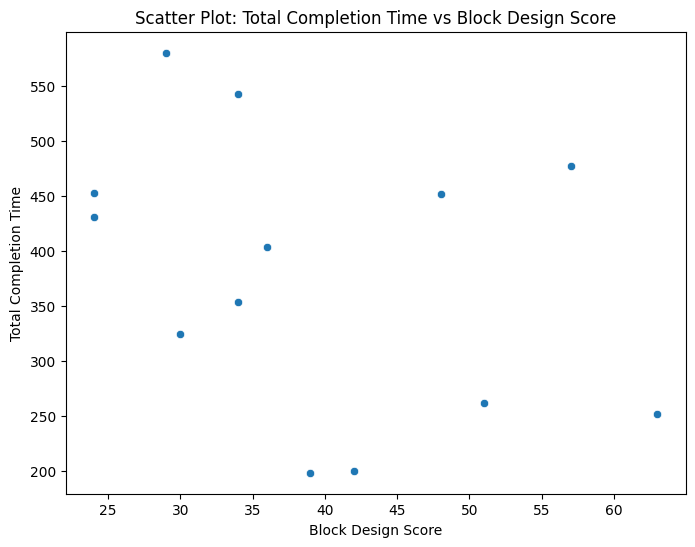

In [18]:
# Question 4: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Block Design Score'], y=df_merged['Total Completion Time'])
plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time")
plt.title("Scatter Plot: Total Completion Time vs Block Design Score")
plt.show()


In [19]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.linear_model import LinearRegression

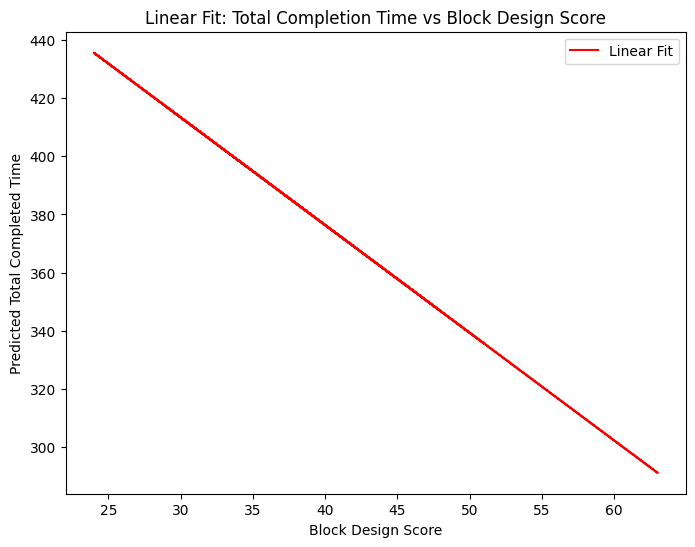


Question 5: Linear Fit Computed and Plotted


In [21]:
# Question 5: Linear Fit for Total Completion Time vs. Block Design Score
if 'Total Completion Time' in df_merged.columns:
    X = df_merged[['Block Design Score']]
    y = df_merged['Total Completion Time']
    model = LinearRegression().fit(X, y)
    df_merged['Predicted Time'] = model.predict(X)
    
    # Linear Fit
    plt.figure(figsize=(8, 6))
    plt.plot(df_merged['Block Design Score'], df_merged['Predicted Time'], color='red', label='Linear Fit')
    plt.xlabel("Block Design Score")
    plt.ylabel("Predicted Total Completed Time")
    plt.title("Linear Fit: Total Completion Time vs Block Design Score")
    plt.legend()
    plt.show()
    
    print("\nQuestion 5: Linear Fit Computed and Plotted")


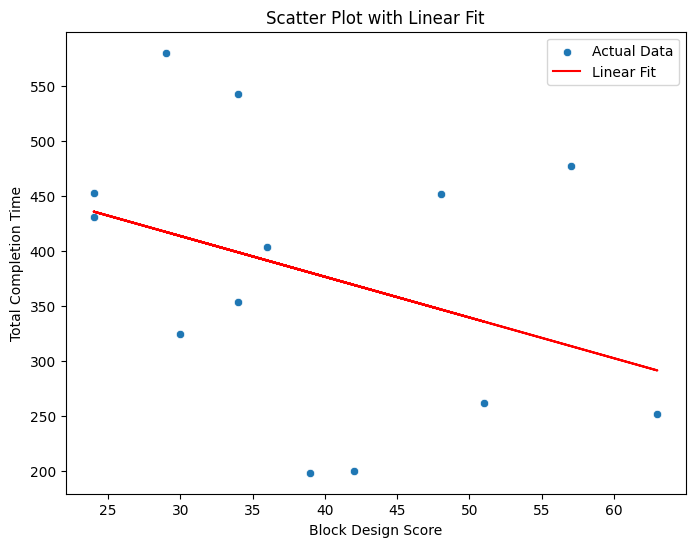


Question 6: Linear Fit Overlaid on Scatter Plot


In [22]:
# Question 6: Overlay Linear Fit on Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Block Design Score'], y=df_merged['Total Completion Time'], label='Actual Data')
plt.plot(df_merged['Block Design Score'], df_merged['Predicted Time'], color='red', label='Linear Fit')
plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time")
plt.title("Scatter Plot with Linear Fit")
plt.legend()
plt.show()

print("\nQuestion 6: Linear Fit Overlaid on Scatter Plot")


Question 8: New Quantitative Measure
Efficiency Score Computed: Higher values indicate better performance relative to cognitive ability.


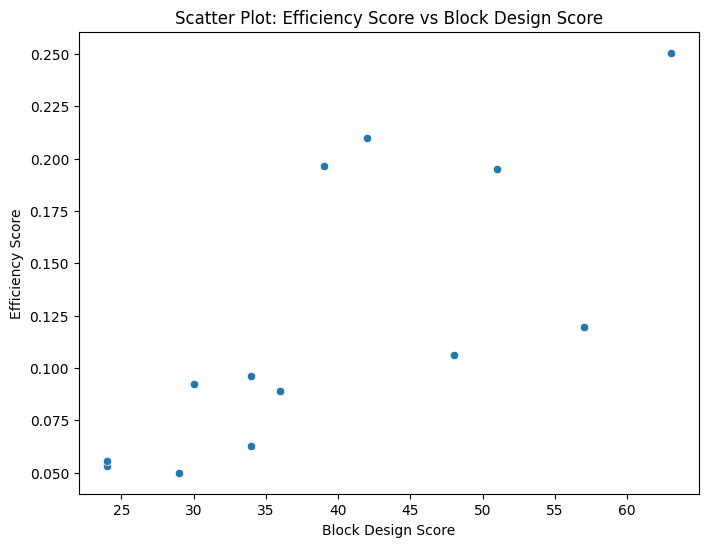


Question 8: Spearman Correlation for Efficiency Score: 0.860, p-value: 0.000


In [23]:
# Question 8: Propose and Compute a New Quantitative Measure
print("\nQuestion 8: New Quantitative Measure")
df_merged['Efficiency Score'] = df_merged['Block Design Score'] / df_merged['Total Completion Time']
print("Efficiency Score Computed: Higher values indicate better performance relative to cognitive ability.")

# Visualizing Efficiency Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Block Design Score'], y=df_merged['Efficiency Score'])
plt.xlabel("Block Design Score")
plt.ylabel("Efficiency Score")
plt.title("Scatter Plot: Efficiency Score vs Block Design Score")
plt.show()

#Spearman Correlation for Efficiency Score
if 'Efficiency Score' in df_merged.columns:
    correlation_eff, p_value_eff = spearmanr(df_merged['Efficiency Score'], df_merged['Block Design Score'], nan_policy='omit')
    print(f"\nQuestion 8: Spearman Correlation for Efficiency Score: {correlation_eff:.3f}, p-value: {p_value_eff:.3f}")


Question 9: New Metric Analysis


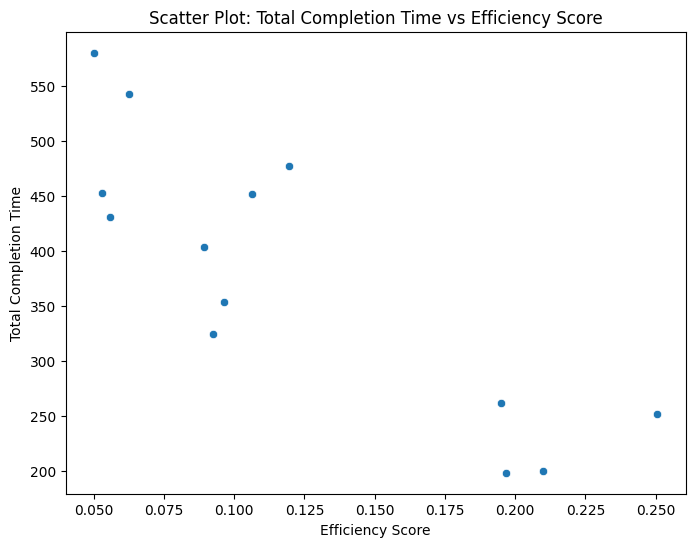


Question 9: Spearman Correlation for Efficiency Score vs Total Completion Time: -0.769, p-value: 0.002


In [24]:
# Question 9: Spearman Correlation and Scatter Plot for New Metric
print("\nQuestion 9: New Metric Analysis")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Efficiency Score'], y=df_merged['Total Completion Time'])
plt.xlabel("Efficiency Score")
plt.ylabel("Total Completion Time")
plt.title("Scatter Plot: Total Completion Time vs Efficiency Score")
plt.show()

# Spearman Correlation for Efficiency Score vs Total Completion Time
if 'Efficiency Score' in df_merged.columns:
    correlation_eff_vs_time, p_value_eff_vs_time = spearmanr(df_merged['Efficiency Score'], df_merged['Total Completion Time'], nan_policy='omit')
    print(f"\nQuestion 9: Spearman Correlation for Efficiency Score vs Total Completion Time: {correlation_eff_vs_time:.3f}, p-value: {p_value_eff_vs_time:.3f}")